### Understanding the Problem

 * The goal is to classify iris flowers into one of three species based on four features: sepal length,
   sepal width, petal length, and petal width.

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

### 2. Dataset Preparation

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### 3.  Data Exploration and Visualization

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

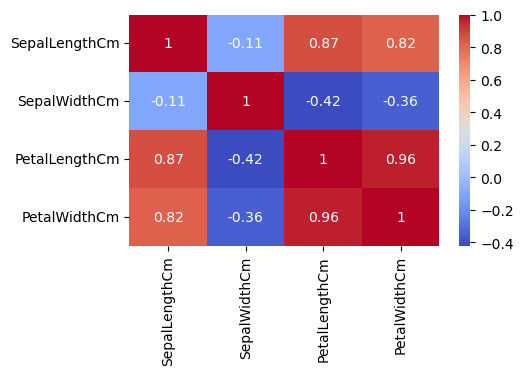

In [9]:
fig,ax = plt.subplots(figsize=(5,3))
sns.heatmap(df.corr(),annot=True,ax=ax,cmap='coolwarm')

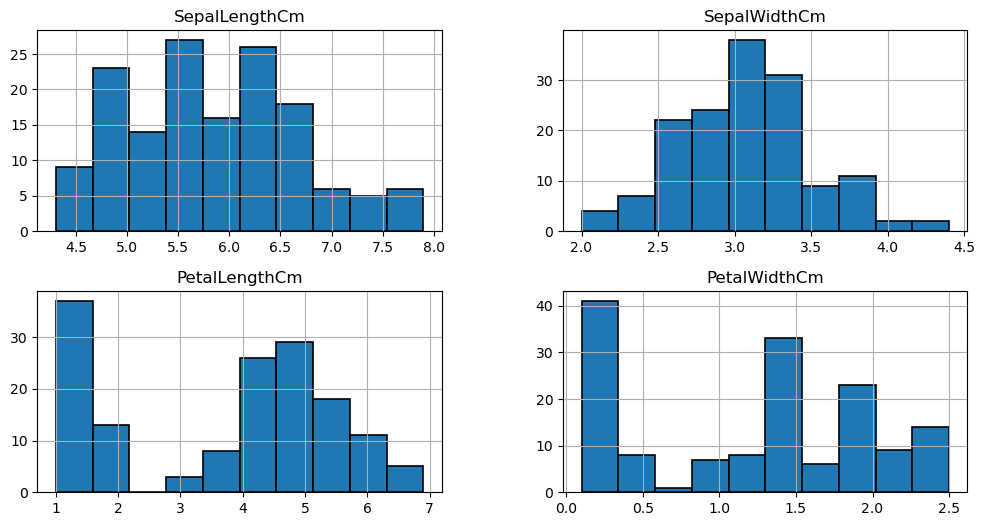

In [10]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

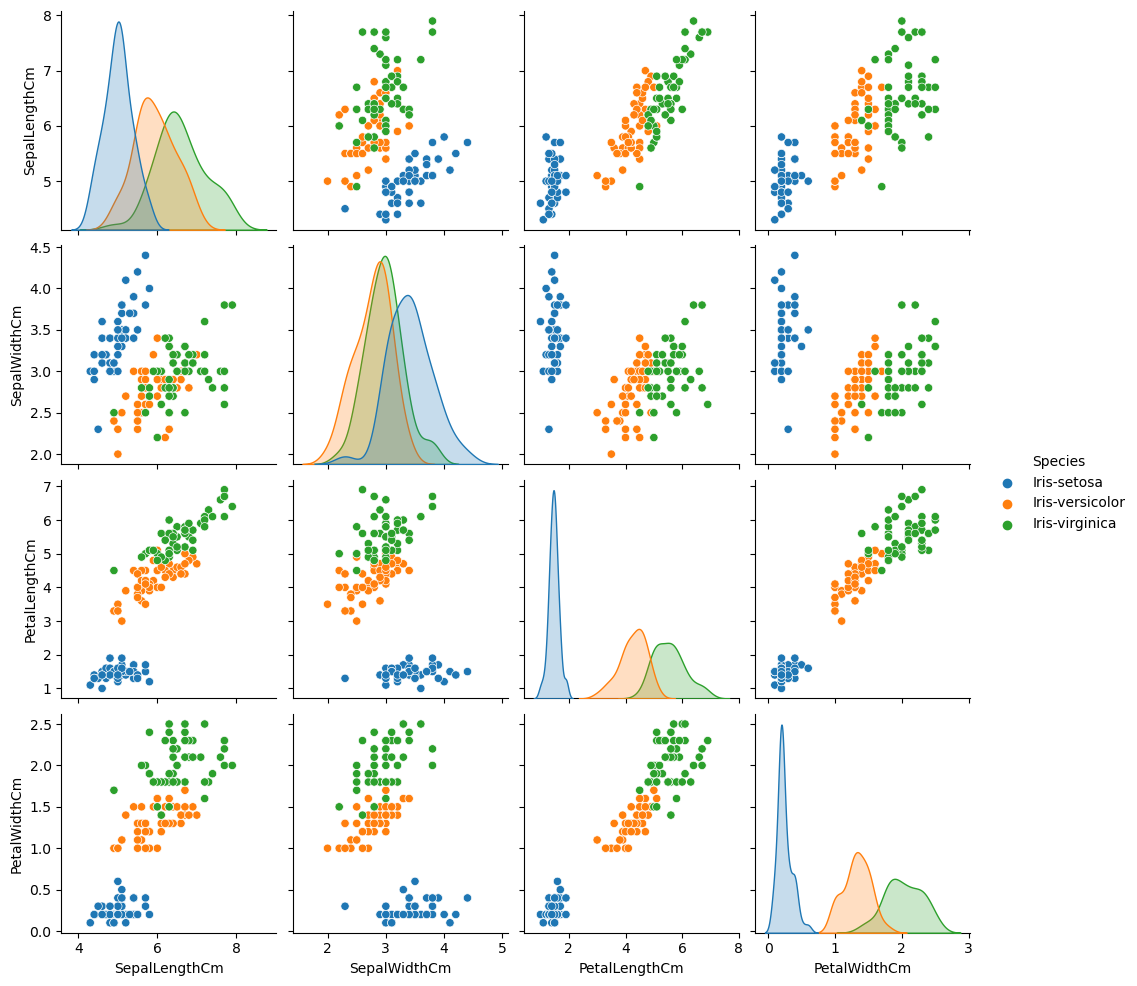

In [11]:
sns.pairplot(df, hue="Species")
plt.show()

Text(0.5, 1.0, 'Petal Width by Species')

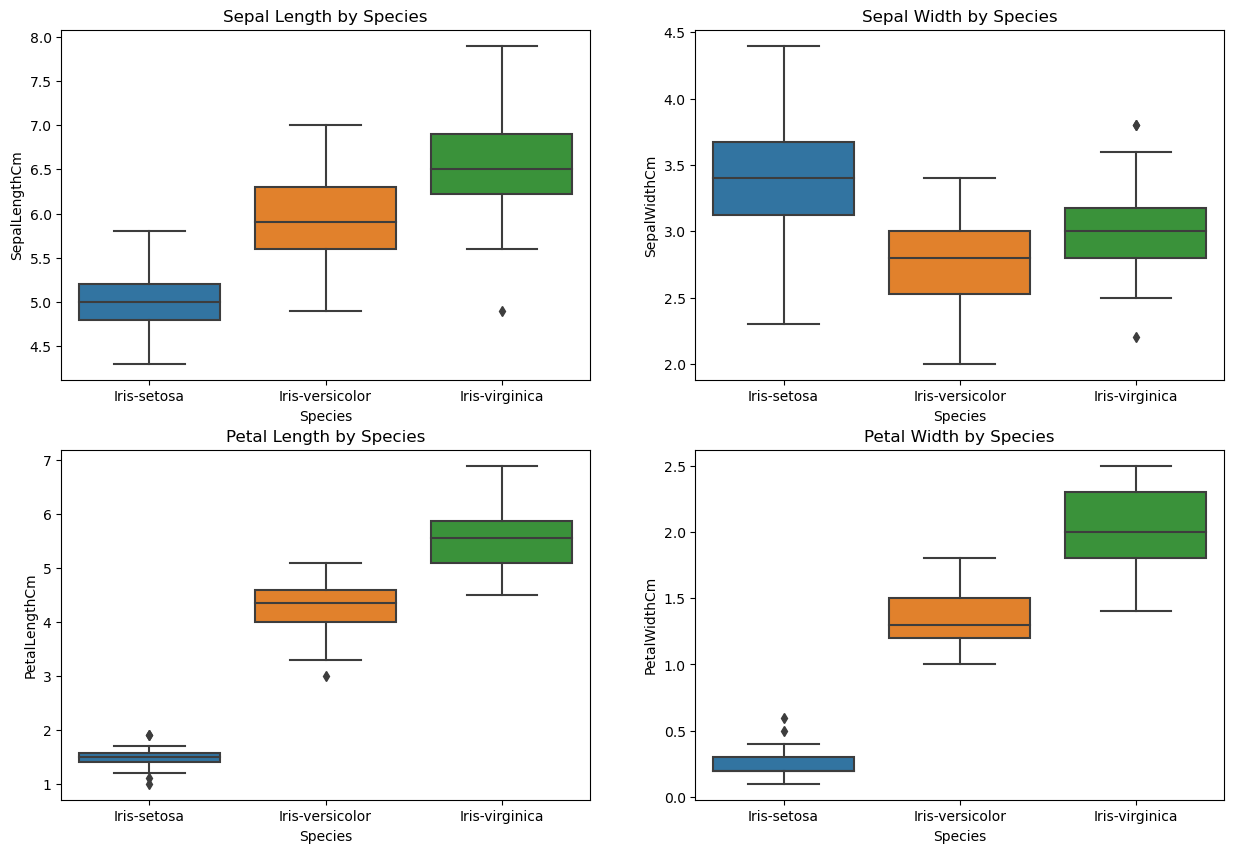

In [12]:
# make box plots of all the numeric columns using for loop and plotly
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.title('Sepal Length by Species')

plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.title('Sepal Width by Species')

plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.title('Petal Length by Species')

plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.title('Petal Width by Species')

In [13]:
# Calculate the IQR
q1 = df['SepalLengthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1

# Calculate the LOF and UFO
lof = q1 - 1.5 * iqr
ufo = q3 + 1.5 * iqr
print(lof)
print(ufo)
# Identify the outliers
outliers1 = df[df['SepalLengthCm'] < lof]
outliers2 = df[df['SepalWidthCm'] > ufo]

# Combine the outliers using concat
outliers = pd.concat([outliers1, outliers2])

# Print the outliers
print(outliers)

7.799999999999999
0.6000000000000001
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[299 rows x 5 columns]


Text(0.5, 1.0, 'Petal Width by Species')

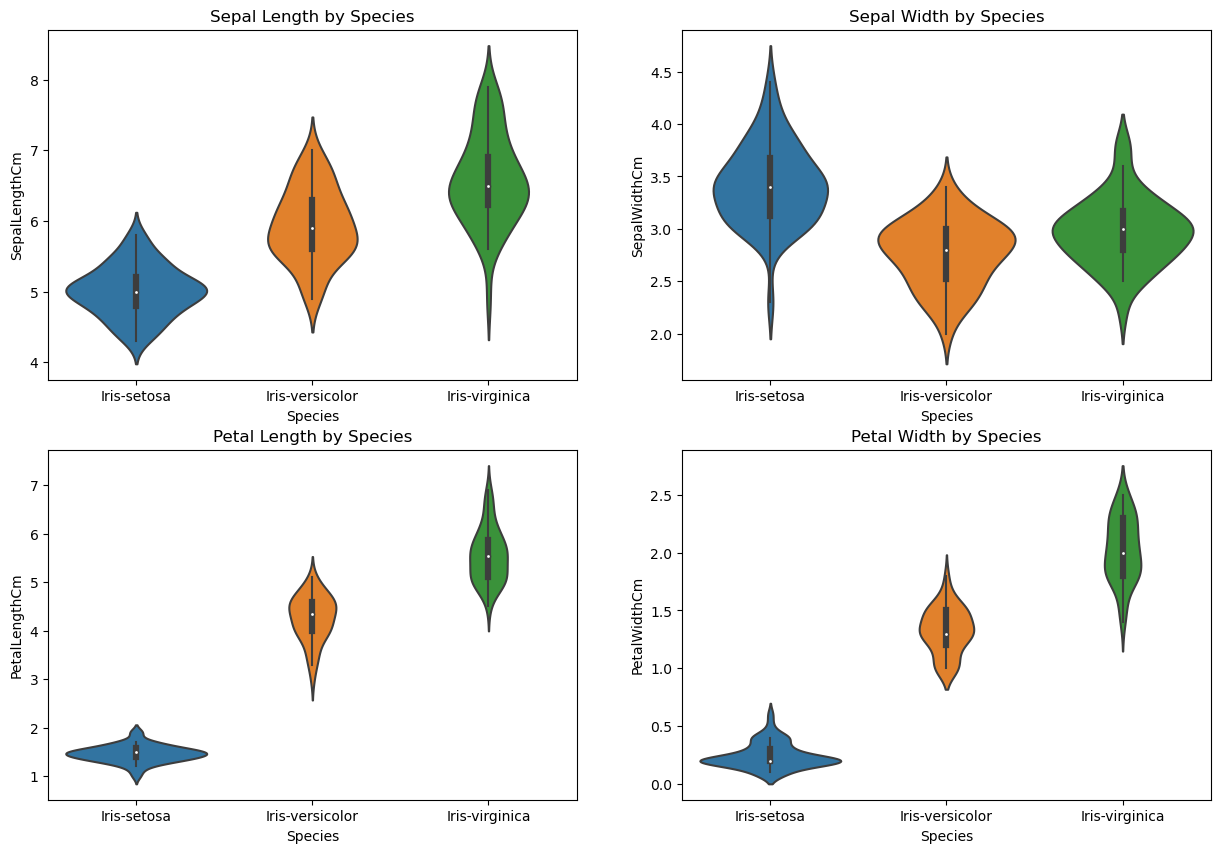

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.title('Sepal Length by Species')

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.title('Sepal Width by Species')

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.title('Petal Length by Species')

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.title('Petal Width by Species')

### 4. Data Preprocessing

In [15]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

# Input data
X = df.drop(columns=['Species'])
# Output data
Y = df['Species']
# Spli the data for train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### 5. Model Selection and Training

In [17]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,accuracy_score,confusion_matrix

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 5.1 Logistic Regression

In [19]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [20]:
pred = model.predict(x_test)
accuracy_score(pred,y_test)

1.0

#### 5.2 DecisionTreeClassification

In [21]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
pred1 = model1.predict(x_test)
accuracy_score(pred1,y_test)

1.0

#### 5.3 Kneighbourclassifier

In [23]:
model2 = KNeighborsClassifier(n_neighbors = 5)
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
pred2 = model2.predict(x_test)
accuracy_score(pred2,y_test)

1.0

#### 5.4 SVM

In [25]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(x_train, y_train)

SVC()

In [27]:
# Predict from the test dataset
pred3 = svn.predict(x_test)
accuracy_score(y_test, pred3)

1.0

### 6. Testing the model

In [28]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [29]:
x1 = np.array([[5.0, 3.6, 1.4, 0.2]])
prediction = svn.predict(x1)
prediction

array(['Iris-setosa'], dtype=object)

### 7. Model Evaluation

In [30]:
# confution Matrix
print(confusion_matrix(y_test,pred3))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [31]:
print(classification_report(y_test,pred3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



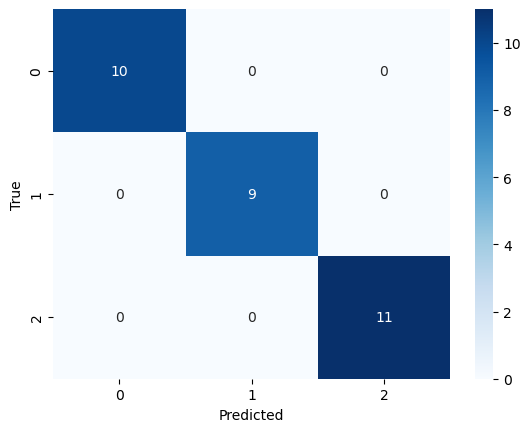

In [32]:
#Plot confusion matrix
sns.heatmap(confusion_matrix(y_test,pred3),annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Saving the Model

In [33]:
import pickle
file_name = 'classiris.pkl'
pickle.dump(model,open(file_name,'wb'))

In [34]:
try :
    with open(file_name, 'wb') as file:
        pickle.dump(file_name, file)
    print("Model saved successfully")
except Exception as e:
    print(f'error saving the model : {e}')

Model saved successfully
